### ANALISIS DE REGRESION LINEAL

<li>Parte 1: Leyendo datos de la base de datos sunat.sqlite</li>
<li>Parte 2: Analizando la correlacion de las variables a evaluar </li>
<li>Parte 3: Realizando la regresion lineal</li>
<li>Parte 4: Prediciendo resultados</li>

### Explicacion:
Se desea predecir el numero de agentes optimo para cada dia de la semana, para ello se tomara en cuenta
el numero de intervenciones (se calculara un promedio por dia de la semana) y el dia de la semana,
expresado numericamente del 1 al 7.

### Parte 1: Leyendo datos de la base de datos sunat.sqlite
Vamos a importar las librerias necesarias para poder ejecutar el analisis de regresion lineal correspondiente
(instalar esto pip install ipympl para poder manejar graficos interactivos)
descomentar
#%matplotlib notebook
y ejecutar en jupyner notebook para ver la interactividad

In [34]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import sqlite3 as sql
from sklearn import linear_model 
import seaborn as sns 

Creamos la coneccion y el cursor a la base de datos sunat.sqlite

In [35]:
con=sql.connect('sunat.sqlite')
cur=con.cursor()

Leemos la vista que ya existe desde la base de datos sqlite y mostramos los primeros datos de la misma
lo almacenamos en el dataframe data el cual luego pasaremos a analizar

In [55]:
data=pd.read_sql('select fechaintervencion as [Fecha Intervencion],nombreDia ,nrointervenciones as [Nro. Intervenciones],agentes as [Agentes],pnp as[Pnp],total as [Total bienes fiscalizados] from AnalisisPersonas where agentes!=0',con)
data.head()

,Fecha Intervencion,nombreDia,Nro. Intervenciones,Agentes,Pnp,Total bienes fiscalizados
0,2020-02-03,LUNES,5,9,12.0,55031
1,2020-02-04,MARTES,4,7,12.0,220
2,2020-02-05,MIERCOLES,6,6,10.0,24707
3,2020-02-06,JUEVES,6,6,12.0,37632
4,2020-02-10,LUNES,6,7,12.0,29032


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha Intervencion         28 non-null     object 
 1   nombreDia                  28 non-null     object 
 2   Nro. Intervenciones        28 non-null     int64  
 3   Agentes                    28 non-null     int64  
 4   Pnp                        28 non-null     float64
 5   Total bienes fiscalizados  28 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ KB


Text(0.5, 1.0, 'Total Missing Values')

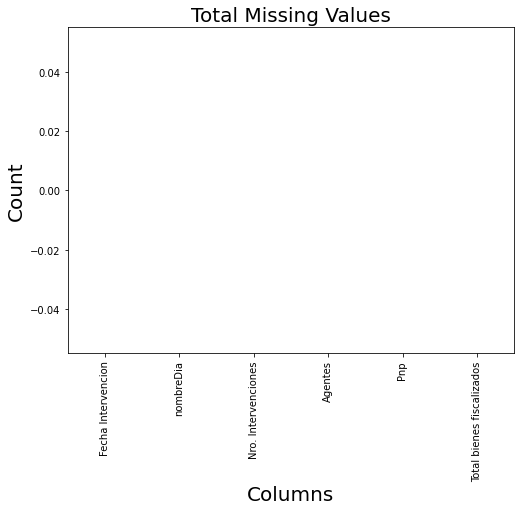

In [57]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

<AxesSubplot:xlabel='Nro. Intervenciones'>

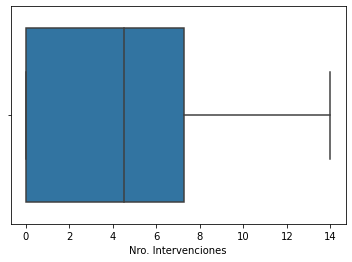

In [39]:
sns.boxplot(x=data['Nro. Intervenciones'])

<AxesSubplot:xlabel='Agentes'>

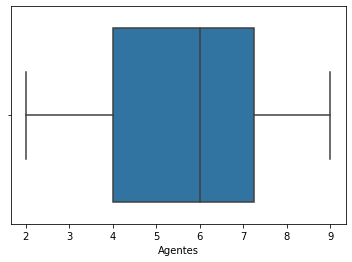

In [40]:
sns.boxplot(x=data['Agentes'])

El parametro nombre dia no lo podemos analizar en nominal, debemos convertirlo a numerico.
Para ello utilizaremos una funcion lambda y la aplicaremo con el apply,
luego mostraremos las primera filas del dataframe data

In [59]:
data['Nombre dia']=data['nombreDia'].apply(lambda numero: 1 if numero == 'LUNES' else 2 if numero == 'MARTES' else 3 if numero == 'MIERCOLES' else 4 if numero == 'JUEVES' else 5 if numero == 'VIERNES' else 6 if numero == 'SABADO' else 7)
data.head()

,Fecha Intervencion,nombreDia,Nro. Intervenciones,Agentes,Pnp,Total bienes fiscalizados,Nombre dia
0,2020-02-03,LUNES,5,9,12.0,55031,1
1,2020-02-04,MARTES,4,7,12.0,220,2
2,2020-02-05,MIERCOLES,6,6,10.0,24707,3
3,2020-02-06,JUEVES,6,6,12.0,37632,4
4,2020-02-10,LUNES,6,7,12.0,29032,1


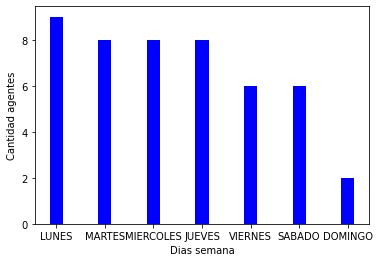

In [60]:
N = 3
ind = data['nombreDia'] # the x locations for the groups
width = 0.27 
fig = plt.figure()
ax = fig.add_subplot(111)
yvals = data['Agentes']
rects1 = ax.bar(ind, yvals, width, color='b')
ax.set_ylabel('Cantidad agentes')
ax.set_xlabel('Dias semana')
plt.show()

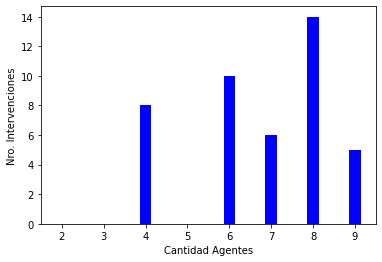

In [61]:
N = 3
ind = data['Agentes'] # the x locations for the groups
width = 0.27 
fig = plt.figure()
ax = fig.add_subplot(111)
yvals = data['Nro. Intervenciones']
rects1 = ax.bar(ind, yvals, width, color='b')
ax.set_ylabel('Nro. Intervenciones')
ax.set_xlabel('Cantidad Agentes')
plt.show()

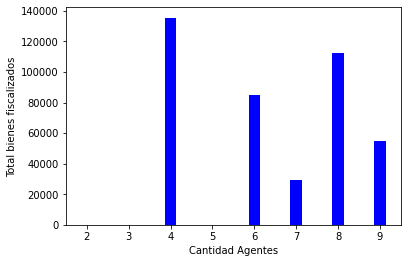

In [62]:
N = 3
ind = data['Agentes'] # the x locations for the groups
width = 0.27 
fig = plt.figure()
ax = fig.add_subplot(111)
yvals = data['Total bienes fiscalizados']
rects1 = ax.bar(ind, yvals, width, color='b')
ax.set_ylabel('Total bienes fiscalizados')
ax.set_xlabel('Cantidad Agentes')
plt.show()

### Parte 2: Analizando la correlacion de las variables a evaluar

Mostramos una matriz de datos estadisticos (la transponnemos)
esta matriz especificamente los promedios nos servira despues para poder hacer las predicciones

In [63]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Nro. Intervenciones,28.0,4.321429,4.110092,0.0,0.0,4.5,7.25,14.0
Agentes,28.0,5.607143,2.166056,2.0,4.0,6.0,7.25,9.0
Pnp,28.0,7.928571,4.198135,0.0,6.0,8.0,12.00,12.0
Total bienes fiscalizados,28.0,29242.321429,40212.025448,0.0,0.0,9455.0,41981.75,135520.0
Nombre dia,28.0,3.607143,1.950105,1.0,2.0,3.5,5.00,7.0


Creando la matriz de correlacion usando pearson, nos ayudara a analizar que variables son corelacionales
con el numero de agentes y esas seran las variables que nos ayudaran predecir el numero optimo de agentes

In [64]:
data.corr('pearson')

,Nro. Intervenciones,Agentes,Pnp,Total bienes fiscalizados,Nombre dia
Nro. Intervenciones,1.000000,0.709464,0.327646,0.663066,-0.561274
Agentes,0.709464,1.000000,0.501847,0.385100,-0.774416
Pnp,0.327646,0.501847,1.000000,0.037372,-0.320234
Total bienes fiscalizados,0.663066,0.385100,0.037372,1.000000,-0.480708
Nombre dia,-0.561274,-0.774416,-0.320234,-0.480708,1.000000


Como podemos observar en la matriz analizando los agentes con las demas variables tenemos que existen dos
variables que tienen una correlacion alta mayor a 0.7 y seran las que nos interesen analizar.

Si aun no lo podemos ver claramente acontinuacion mostraremos la misma matriz pero de manera grafica donde
podemos ver a mayor detalle las variables que tienen mayor correlacion.

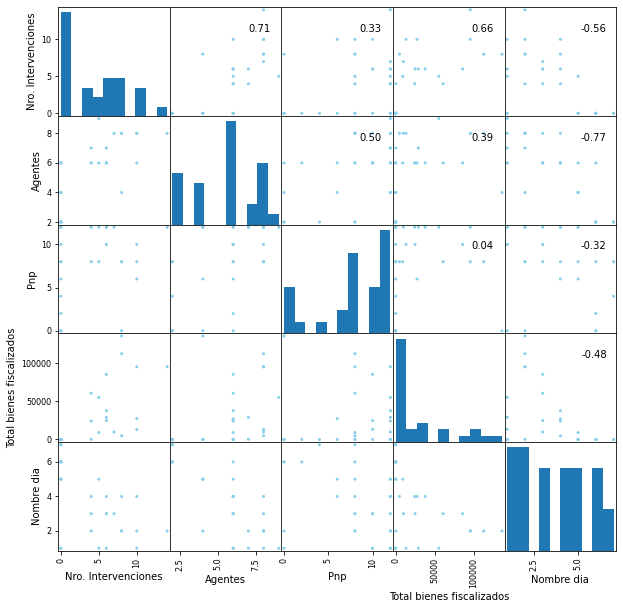

In [65]:
axes = scatter_matrix(data, alpha=1, figsize=(10,10), color="skyblue")
corr = data.corr('pearson').values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.savefig("Proyectomatrix_scatter.png" ) 
#ruta imagen guardada
plt.show()

Como podemos ver en la matriz las variables que mas correlacion tienen con el nro de agentes
que es la variable que nos interesa predecir son nombredia y nrointervenciones
por lo que solo tomaremos en cuenta  dos variables predictoras que ayudaran a determinar el numero de
agentes que se necesita segun el dia.
eliminaremos las demas columnas y mostramos como quedo nuestro dataframe

In [72]:
data.drop(['Pnp', 'Total bienes fiscalizados'],axis=1,inplace=True)
data.head()

,Fecha Intervencion,nombreDia,Nro. Intervenciones,Agentes,Nombre dia
0,2020-02-03,LUNES,5,9,1
1,2020-02-04,MARTES,4,7,2
2,2020-02-05,MIERCOLES,6,6,3
3,2020-02-06,JUEVES,6,6,4
4,2020-02-10,LUNES,6,7,1


Mostramos el grafico nuevamente con solo las columnas 
solo debemos fijarnos en la corelacion de agentes con las otras dos variables
<li>agentes-nombredia correlacion negativa (-0.77)</li>
<li>agentes-nrointervenciones correlacion positiva (0.71)</li>
matriz de correlacion grafica

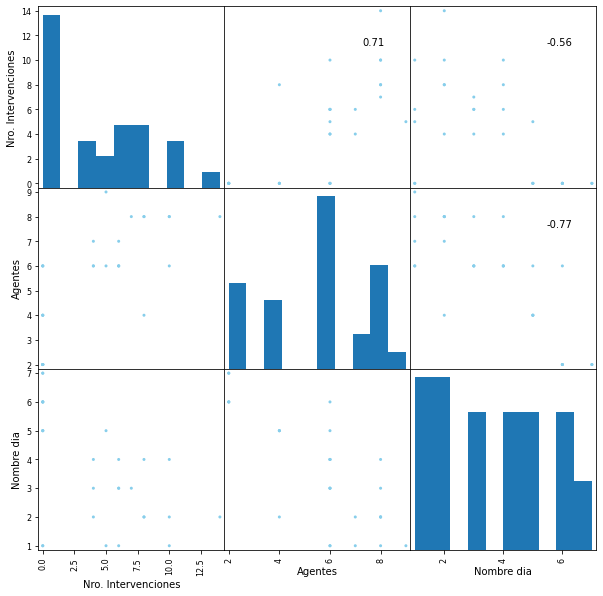

In [73]:
axes = scatter_matrix(data, alpha=1, figsize=(10,10), color="skyblue")
corr = data.corr('pearson').values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.savefig("Proyectomatrix_scatter.png" ) 
plt.show()

### Parte 3: Realizando la regresion lineal

Ahora empezaremos a construir la regresion lineal multiple, para ello primero graficaremos las dos variables
esto nos ayudara luego para mostrar la linea de regresion linea, como son varias variables independientes
(2 variables independientes) necesitaremos hacerlo en un plano de  3D

AttributeError: 'DataFrame' object has no attribute 'nombreDia'

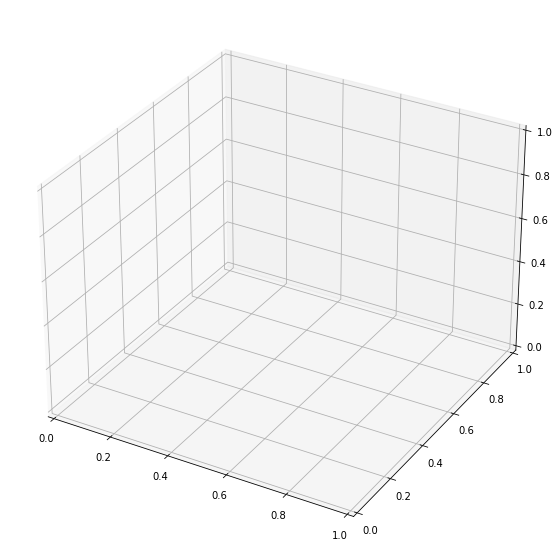

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.nombreDia,data.nrointervenciones,data.agentes,c='Blue', marker='o',label='Dispersion', alpha=0.5)
ax.set_xlabel('Dias')
ax.set_ylabel('Nro Intervenciones')
ax.set_zlabel('Nro Agentes')
plt.legend()
plt.show()

En base a ello aplicaremos la regresion lineal teniendo como variables independientes a nombre dia y numero
de intervenciones, mientras que la variable a predecir es la de numero de agentes

In [11]:
reg=linear_model.LinearRegression()
reg.fit(data[['nombreDia','nrointervenciones']],data.agentes)

LinearRegression()

Despues de aplicar la regresion lineal ya podemos ver los coeficientes generados

In [12]:
reg.coef_

array([-0.61006025,  0.21143098])

Con ello ya podriamos hacer predicciones con los valores pre existentes como podemos apreciar en el
codigo

In [13]:
Agentes_predi=reg.predict(data[['nombreDia','nrointervenciones']])
Agentes_predi 

array([7.34112811, 6.51963688, 6.33243859, 5.72237834, 7.5525591 ,
       7.36536081, 6.54386957, 6.56810227, 8.39828303, 8.6339467 ,
       6.33243859, 5.29951637, 7.78822277, 5.90957662, 6.1452403 ,
       4.9008871 , 7.36536081, 3.23367193, 2.62361168, 3.84373219,
       3.23367193, 2.62361168, 3.84373219, 3.23367193, 3.84373219,
       3.23367193, 6.2839732 , 6.2839732 ])

Ademas tambien podemos crear la ecuacion de prediccion, en base a los coeficientes y al punto de intercepcion
que nos servira como la constante de la ecuacion

In [14]:
a=reg.coef_[0] 
b=reg.coef_[1]
i=reg.intercept_

print('Ecuacion de regresion lineal')
print('NroAgentes=',"%.2f" %a,'nombreDia+',"%.2f" %b,'nrointervenciones+',"%.2f" %i )

Ecuacion de regresion lineal
NroAgentes= -0.61 nombreDia+ 0.21 nrointervenciones+ 6.89


Bien ahora si podemos hacer nuevamente la grafica y ver la linea de regresion que se forma 

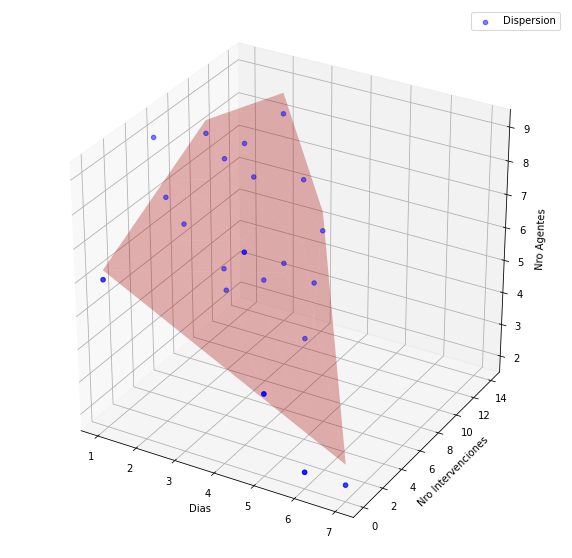

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.nombreDia,data.nrointervenciones,data.agentes,c='Blue', marker='o',label='Dispersion', alpha=0.5)
ax.plot_trisurf(data.nombreDia,data.nrointervenciones,Agentes_predi, color='Red' , alpha=0.3)
ax.set_xlabel('Dias')
ax.set_ylabel('Nro Intervenciones')
ax.set_zlabel('Nro Agentes')
plt.legend()
plt.show()

### Parte 4: Prediciendo resultados

Necesitamos obtener dos variables el dia y el promedio de intervenciones por dia, eso lo sacaremos desde
a base de datos sunat.sqlite, ademas se ira actualizando a medida que se vayan cargando los datos mediante
nuestro proceso ETL creado en la primera parte del trabajo. y se iran prediciendo con frecuencia mensual,
puesto que el plan de trabajo se hace mensual en la sunat.

Crearemos un dataframe que contenga los datos que necesitamos para predecir el numero optimo de agentes y mostraremos los datos cargados

In [16]:
datos_predecir=pd.read_sql('select nombreDia,avg(nrointervenciones) prome from  AnalisisPersonas  group by nombreDia',con)
datos_predecir.head(10)

,nombreDia,prome
0,DOMINGO,2.00
1,JUEVES,8.00
2,LUNES,4.20
3,MARTES,8.80
4,MIERCOLES,5.75
5,SABADO,1.20
6,VIERNES,3.00


Nuevamente el nombre de los dias lo debemos pasar a numerico para poder usarlos en la ecuacion

In [17]:
datos_predecir['nombreDia']=datos_predecir['nombreDia'].apply(lambda numero: 1 if numero == 'LUNES' else 2 if numero == 'MARTES' else 3 if numero == 'MIERCOLES' else 4 if numero == 'JUEVES' else 5 if numero == 'VIERNES' else 6 if numero == 'SABADO' else 7)
datos_predecir.sort_values(by=['nombreDia'])

,nombreDia,prome
2,1,4.20
3,2,8.80
4,3,5.75
1,4,8.00
6,5,3.00
5,6,1.20
0,7,2.00


Ahora si con los valores ya establecidos, predecimos los agentes optimos po cada dia de la semana

In [18]:
df = pd.DataFrame(columns=['Dia', 'Intervenciones','Agentes'])

for fila in datos_predecir.sort_values(by=['nombreDia']).index:
    x1=datos_predecir.loc[fila,'nombreDia']
    x2=datos_predecir.loc[fila,'prome']
    X=[[datos_predecir.loc[fila,'nombreDia'],datos_predecir.loc[fila,'prome']]]
    Y=reg.predict(X) 
    df = df.append({'Dia': x1,'Intervenciones':x2,'Agentes':Y[0]}, ignore_index=True)
    
df

,Dia,Intervenciones,Agentes
0,1.0,4.20,7.171983
1,2.0,8.80,7.534506
2,3.0,5.75,6.279581
3,4.0,8.00,6.145240
4,5.0,3.00,4.478025
5,6.0,1.20,3.487389
6,7.0,2.00,3.046474


Como podemos ver el cuadro anterior podemos apreciar que la cantidad de elementos optimo para cada dia de la
semana es:
<li>Lunes 7 agentes</li>
<li>Martes 8 agentes</li>
<li>Miercoles 6 agentes</li>
<li>Jueves 6 agentes</li>
<li>Viernes 5 agentes</li>
<li>Sabado 4 agentes</li>
<li>Domingo 3 agentes</li>

In [82]:
fin=data.loc[(data.nombreDia=="SABADO" ) | (data.nombreDia=="DOMINGO")]
semana=data.loc[(data.nombreDia!="SABADO") & (data.nombreDia!="DOMINGO")]

In [83]:
fin

,Fecha Intervencion,nombreDia,Nro. Intervenciones,Agentes,Nombre dia
17,2020-02-01,SABADO,0,6,6
18,2020-02-02,DOMINGO,0,2,7
20,2020-02-08,SABADO,0,2,6
21,2020-02-09,DOMINGO,0,2,7
23,2020-02-15,SABADO,0,2,6
25,2020-02-22,SABADO,0,2,6


In [84]:
semana

,Fecha Intervencion,nombreDia,Nro. Intervenciones,Agentes,Nombre dia
0,2020-02-03,LUNES,5,9,1
1,2020-02-04,MARTES,4,7,2
2,2020-02-05,MIERCOLES,6,6,3
3,2020-02-06,JUEVES,6,6,4
4,2020-02-10,LUNES,6,7,1
5,2020-02-11,MARTES,8,8,2
6,2020-02-12,MIERCOLES,7,8,3
7,2020-02-13,JUEVES,10,6,4
8,2020-02-17,LUNES,10,8,1
9,2020-02-18,MARTES,14,8,2


In [86]:
f_agentes = fin.Agentes
s_agentes = semana.Agentes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Agentes', ylabel='Density'>

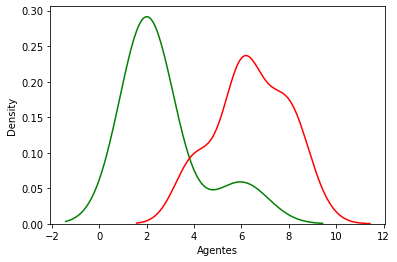

In [87]:
sns.distplot(f_agentes,color='green',hist=False)
sns.distplot(s_agentes,color='red',hist=False)

In [92]:
fin.Agentes.mean()

2.6666666666666665

In [93]:
semana.Agentes.mean()

6.409090909090909

In [94]:
import scipy.stats as stats 
from scipy.stats import chi2_contingency

In [95]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(f_agentes, s_agentes)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -5.320185979710964 , p_value1 =  1.4463395136880838e-05


In [96]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 1.4463395136880838e-05 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between bmi of females and bmi of males.
